In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats

In [4]:
import pandas_datareader as web 

In [24]:
spy_etf = web.DataReader('SPY', 'yahoo', start, end)

In [26]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-17,226.779999,225.800003,226.309998,226.250000,61240800.0,207.071930
2017-01-18,226.800003,225.899994,226.539993,226.750000,54793300.0,207.529510
2017-01-19,227.000000,225.410004,226.839996,225.910004,66608800.0,206.760742
2017-01-20,227.309998,225.970001,226.699997,226.740005,129168600.0,207.520355
2017-01-23,226.809998,225.270004,226.740005,226.149994,75061600.0,206.980392


In [27]:
start = pd.to_datetime('2017-01-18')
end = pd.to_datetime('2022-01-18')

In [28]:
aapl = web.DataReader('AAPL', 'yahoo', start, end)

In [29]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-17,30.059999,29.555000,29.584999,30.000000,137759200.0,28.238453
2017-01-18,30.125000,29.927500,30.000000,29.997499,94852000.0,28.236097
2017-01-19,30.022499,29.842501,29.850000,29.945000,102389200.0,28.186686
2017-01-20,30.112499,29.932501,30.112499,30.000000,130391600.0,28.238453
2017-01-23,30.202499,29.942499,30.000000,30.020000,88200800.0,28.257278


In [30]:
import matplotlib.pyplot as plt 
%matplotlib inline 

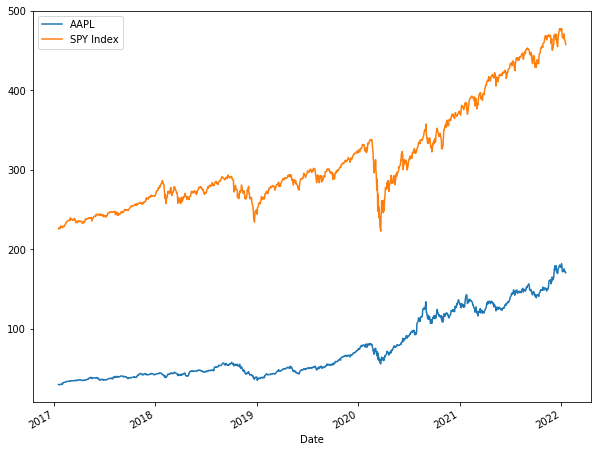

In [31]:
aapl['Close'].plot(label = 'AAPL', figsize=(10,8))
spy_etf['Close'].plot(label = 'SPY Index')
plt.legend()

In [32]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

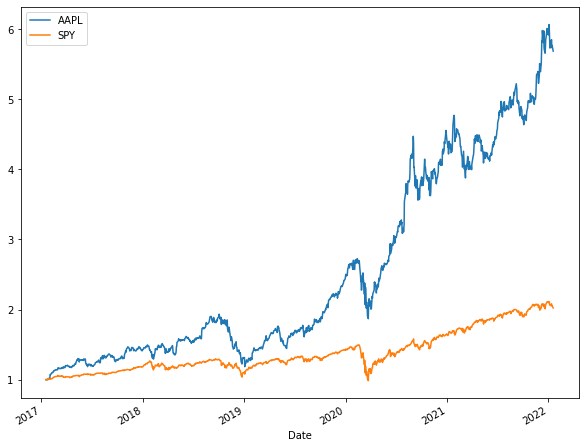

In [33]:
aapl['Cumulative'].plot(label = 'AAPL', figsize=(10,8))
spy_etf['Cumulative'].plot(label = 'SPY')
plt.legend()

In [34]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

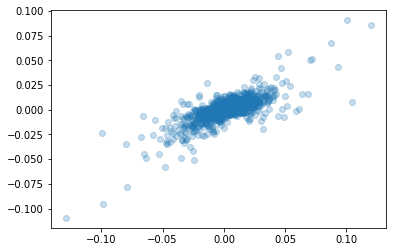

In [36]:
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'], alpha=0.25)

In [38]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:]) 

In [39]:
beta

0.4746471940574115

In [40]:
alpha

-0.00011197713819464006

In [41]:
 r_value

0.763653945747209

In [44]:
spy_etf['Daily Return'].head()

Date
2017-01-17         NaN
2017-01-18    0.002210
2017-01-19   -0.003705
2017-01-20    0.003674
2017-01-23   -0.002602
Name: Daily Return, dtype: float64

In [45]:
noise = np.random.normal(0, 0.001, len(spy_etf['Daily Return'].iloc[1:]))

In [46]:
noise

array([-8.43578447e-06, -3.17685586e-04,  7.91080093e-04, ...,
       -1.61964344e-03, -8.13922441e-04,  7.01055689e-05])

In [49]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

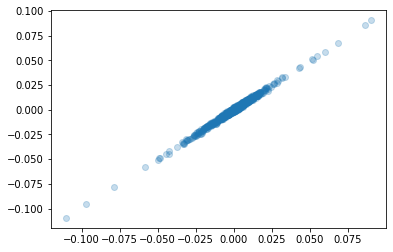

In [51]:
plt.scatter(fake_stock, spy_etf['Daily Return'].iloc[1:], alpha=0.25)

In [52]:
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock, spy_etf['Daily Return'].iloc[1:])

In [53]:
beta

0.9936288248092394

In [54]:
alpha

6.934050604339294e-06